# Dense matrix routines

The routines in the module *Dense* were specific made for research purposes. They can be regarded as extra, and even dispensable for the general user. These routines are concerned in analyzing the structure of the problem itself and they are useful for people interested in the condition number of the approximated Hessian at each step, the strucutre of the Jacobian matrix of the residual function, and so on. All dense routines are much more slower than their standard versions. Therefore, only use them if you really need to.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import TensorFox as tfx

In [2]:
# Load the tensor T, which has shape 256 x 32 x 32. 
T = np.load('swimmer.npy')
m, n, p = T.shape
Tsize = np.linalg.norm(T)

In [3]:
# Compute the CPD of T, assuming T has rank 50. 
class options:
    display = 1
    init = 'random'    
r = 50
Lambda, X, Y, Z, T_approx, output = tfx.dns.dense_cpd(T, r, options)

--------------------------------------------------------------------------------------------------------------
Computing MLSVD of T
    Compression detected
    Compressing from (256, 32, 32) to (14, 16, 23)
    100.0 % of the energy was retained
--------------------------------------------------------------------------------------------------------------
Type of initialization: random
--------------------------------------------------------------------------------------------------------------
Computing CPD of T
Final results
    Number of steps = 114
    Relative error = 0.00010900529269036862
    Accuracy =  99.9891 %


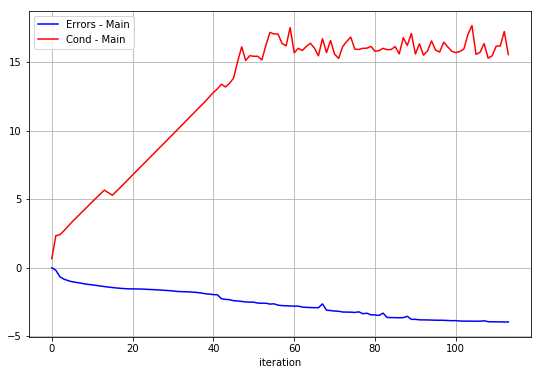

In [4]:
plt.figure(figsize=[9,6])

# We divide the arrays of errors by the norm of T to obtain values associated to the relative errors.
Tsize = np.linalg.norm(T)

# a is the size of the arrays of the main stage.
a = output.step_sizes[0].size

# Errors
plt.plot(np.arange(a), np.log10(output.errors[0]/Tsize),'b-' , markersize=2, label='Errors - Main')

# Errors diff
plt.plot(np.arange(a), np.log10(output.conds[0]/Tsize), 'r-', markersize=2, label='Cond - Main')

plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

Note that we used a tensor of shape $14 \times 16 \times 23$ to approximate the original one. The sparse structure of the Jacobian matrix and approximated Hessian associated to tensor of this shape is showed below. The actual values used to generate this structures are not so important, what really matters is where they are zero and where they are non zero. Also, since the Jacobian and the approximated Hessian are very large, this function also return they as output in case the user want to look in more details (just copy the code in the documentation and apply it to a small piece of the matrix). 

More details about this structure can be found in my doctoral thesis - chapter $3$ (coming soon).

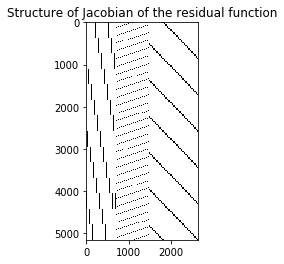

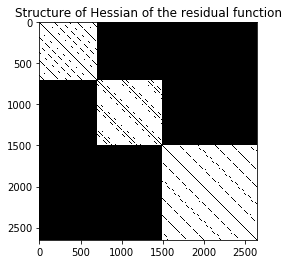

In [5]:
m = 14
n = 16
p = 23
r = 50
damp = 1
X = np.random.randn(m,r)
Y = np.random.randn(n,r)
Z = np.random.randn(p,r)
Jf, H = tfx.dns.plot_strucures(X, Y, Z, damp, m, n, p, r)